In [1]:
#import packages
import cobra 
from cobra import Model, Reaction, Metabolite
import csv 
import os
import pandas as pd
import string
from pylab import *
import matplotlib

%matplotlib inline

In [2]:
model=cobra.io.read_sbml_model("Synechocystis6803_SBML_COBRA_15_2_17.xml"); #import sbml model

cobra/io/sbml.py:149 UserWarning: charge of E1_P680_tlm is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of E1_P700_tlm is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of C04633_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of HB2p_B6_tlm is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of B4_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of C01641_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of ORieske_B6_tlm is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of C05759_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of B6_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of HB2p_B6_cym is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of C16520_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of B2_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarning: charge of C05754_cyt is not a number (-)
cobra/io/sbml.py:149 UserWarn

In [3]:
#Set Constraints

model.change_objective('BM0009')#biomass

model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in
model.reactions.get_by_id('EX0038').lower_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

In [4]:
model.optimize() #optimize
model.solution.f #solution for objective

0.02890392395748319

## Building Squalene Model 

In [5]:
model=cobra.io.read_sbml_model("Synechocystis6803_SBML_COBRA_15_2_17.xml") #import sbml model
model=Model(model) #convert to cobra model
len(model.reactions)

973

In [6]:
Diplotene_ext = Metabolite('Diplotene_ext',
                   formula=' C30H50',
                   name='diplotene_ext',
                   compartment='ext')

Squalene_ext = Metabolite('Squalene_ext',
                   formula=' C30H50',
                   name='squalene_ext',
                   compartment='ext')

C06310_cyt = model.metabolites.get_by_id('C06310_cyt') #diplotene_cyt
C00751_cyt = model.metabolites.get_by_id('C00751_cyt') #squalene_cyt

C00013_cyt = model.metabolites.get_by_id('C00013_cyt') #diphosphate
C00005_cyt = model.metabolites.get_by_id('C00005_cyt') #nadph
C00080_cyt = model.metabolites.get_by_id('C00080_cyt') #h+
C00006_cyt = model.metabolites.get_by_id('C00006_cyt') #nadp+

#create and define all metabolites

In [7]:
reaction1 = Reaction('SS0020') #diplotene_cyt --> diplotene_ext
reaction1.name = 'SS0020'
reaction1.lower_bound = 0.  # This is the default
reaction1.upper_bound = 1000.  # This is the default
reaction1.objective_coefficient = 0. # this is the default

reaction2 = Reaction('SS0021') #squalene cyt --> squalene ext
reaction2.name = 'SS0021'
reaction2.lower_bound = 0.  # This is the default
reaction2.upper_bound = 1000.  # This is the default
reaction2.objective_coefficient = 0. # this is the default

#create reactions

In [8]:
reaction1.add_metabolites({C06310_cyt: -1.0, #diplotene_cyt
                          Diplotene_ext: 1.0}) #diplotene_ext
                        
# 1 hopene_cyt --> 1 hopene_ext

reaction2.add_metabolites({C00751_cyt: -1.0, #squalene
                          Squalene_ext: 1.0}) #squalene_ext

# 1 squalene_cyt --> 1 squalene_ext

#add metabolites to reactions

In [9]:
print('%i reactions in initial model' % len(model.reactions))
print('%i metabolites in initial model' % len(model.metabolites))

model.add_reaction(reaction1)
model.add_reaction(reaction2)

#add reactions to model

print '\n'
print('%i reaction in new model' % len(model.reactions))
print('%i metabolites in new model' % len(model.metabolites))

#check results

973 reactions in initial model
698 metabolites in initial model


975 reaction in new model
700 metabolites in new model


In [10]:
#Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%s : %s' % (x.id, x.formula))
print("Genes")
print("-----")
for x in model.genes:
    reactions_list_str = "{" + ", ".join((i.id for i in x.reactions)) + "}"
    print("%s is associated with reactions: %s" % (x.id, reactions_list_str))

Reactions
---------
PU0004 : C00001_cyt + C00445_cyt + C03838_cyt --> C00080_cyt + C00101_cyt + C04376_cyt
PY0025 : C00337_cyt + C10385_cym --> C00295_cyt + C16695_cym
HI0009_2 : C00003_cyt + C00860_cyt --> C00004_cyt + C00080_cyt + C01929_cyt
CP0013_3 : C00005_cyt + C00007_cyt + C00080_cyt + C04536_cyt --> C00001_cyt + C00006_cyt + C11829_cyt
BT0014 : 2.0 C00019_cyt + 2.0 C00138_cyt + C00283_cyt + C01909_cyt --> 2.0 C00073_cyt + C00120_cyt + 2.0 C00139_cyt + 2.0 C05198_cyt
PY0027_2 : C00001_cyt + C00239_cyt --> C00009_cyt + C00881_cyt
IL0005 : C06006_cyt --> C14463_cyt
PU0018 : C00013_cyt + C00020_cyt <=> C00119_cyt + C00147_cyt
CP0001 : C00002_cyt + C00025_cyt + C01641_cyt --> C00013_cyt + C00020_cyt + C02987_cyt
PU0006 : C00002_cyt + C04640_cyt --> C00008_cyt + C00009_cyt + C03373_cyt
TR0044 : C00001_cyt + C00002_cyt + C00133_pps --> C00008_cyt + C00009_cyt + C00133_cyt
LI0027 : C16220_cyt <=> C00001_cyt + C16221_cyt
PU0011 : C00234_cyt + C04677_cyt --> C00101_cyt + C04734_cyt
TR102

In [11]:
cobra.io.write_sbml_model(model,'squalene.xml') #save new model

file2= open('squalene.xml','r')
s= file2.read()
file2.close()


new = s.replace('boundaryCondition="false" constant="false" hasOnlySubstanceUnits="false" id="M_Squalene_ext"', ' boundaryCondition="true" constant="false" hasOnlySubstanceUnits="false" id="M_Squalene_ext"').replace('boundaryCondition="false" constant="false" hasOnlySubstanceUnits="false" id="M_Hopene_ext"','boundaryCondition="true" constant="false" hasOnlySubstanceUnits="false" id="M_Hopene_ext"')

out = open('squalene.xml', "w")
out.write(new)
out.close()


# --> change boundary condition to true for squalene_ext and hopene_ext

In [12]:
fva_result = cobra.flux_analysis.flux_variability_analysis(model, model.reactions[973:975])
pd.DataFrame.from_dict(fva_result).T

,maximum,minimum
SS0020,0.0,0.0
SS0021,0.0,0.0


In [13]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in
model.reactions.get_by_id('EX0038').lower_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()


'''#ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)
'''

cobra/io/sbml3.py:330 UserWarning: Boundary metabolite 'Squalene_ext' used in reaction 'SS0021'


"#ratiometric bounds\nmodel.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_b

In [14]:
model.change_objective('BM0009')
model.optimize()
model.solution.f

0.028903923957142197

In [15]:
model.change_objective('SS0017')
model.optimize()
model.solution.f

0.04583908321843236

## Building Triterpenoid Models

In [16]:
model=cobra.io.read_sbml_model("squalene.xml")
model=Model(model)
len(model.reactions)

975

In [17]:
#Oxidosqualene

Oxidosqualene_cyt = Metabolite('Oxidosqualene_cyt',
                   formula=' C30H50O',
                   name='oxidosqualene',
                   compartment='cyt')

Oxidosqualene_ext = Metabolite('Oxidosqualene_ext',
                   formula=' C30H50O',
                   name='oxidosqualene',
                   compartment='ext')

#define Metabolites
C00001_cyt = model.metabolites.get_by_id('C00001_cyt') #H2O
C00005_cyt = model.metabolites.get_by_id('C00005_cyt') #NADPH
C00006_cyt = model.metabolites.get_by_id('C00006_cyt') #NADP+
C00007_cyt = model.metabolites.get_by_id('C00007_cyt') #O2
C00080_cyt = model.metabolites.get_by_id('C00080_cyt') #H+
Squalene_cyt = model.metabolites.get_by_id('C00751_cyt') #squalene_cyt

#define reactions
reaction3 = Reaction('SS0022') #squalene --> oxidosqualen
reaction3.name = 'SS0022'
reaction3.lower_bound = 0.  # This is the default
reaction3.upper_bound = 1000.  # This is the default
reaction3.objective_coefficient = 0.

reaction4 = Reaction('SS0023') #oxidosqualene_cyt --> ext
reaction4.name = 'SS0023'
reaction4.lower_bound = 0.  # This is the default
reaction4.upper_bound = 1000.  # This is the default
reaction4.objective_coefficient = 0.

#add metabolites to reactions
reaction3.add_metabolites({Squalene_cyt: -1.0, #Squalen
                          C00005_cyt: -1.0, #NADPH
                          C00080_cyt: -1.0, #H+
                          C00007_cyt: -1.0, #O2
                          C00006_cyt: 1.0, #NADP+
                          C00001_cyt: 1.0, #H2O
                          Oxidosqualene_cyt: 1.0}) #Oxidosqualen

# 1 squalene + 1 NADPH + 1H+ + 1 O2 --> 1 oxidosqualene + 1 NADP+ + 1 H2O

reaction4.add_metabolites({Oxidosqualene_cyt: -1.0, #Oxidosqualene_cyt
                           Oxidosqualene_ext: 1.0})

# 1 oxidosqualene_cyt --> 1 oxidosqualene_ext

#add reactions to model
model.add_reaction(reaction3)
model.add_reaction(reaction4)
len(model.reactions)

#save model
cobra.io.write_sbml_model(model,'oxidosqualene.xml') #save new model

file2= open('oxidosqualene.xml','r')
s= file2.read()
file2.close()


new = s.replace('boundaryCondition="false" constant="false" hasOnlySubstanceUnits="false" id="M_Oxidosqualene_ext"','boundaryCondition="true" constant="false" hasOnlySubstanceUnits="false" id="M_Oxidosqualene_ext"')

out = open('oxidosqualene.xml', "w")
out.write(new)
out.close()

In [18]:
#beta_amyrin

am_model=cobra.io.read_sbml_model("oxidosqualene.xml")
am_model=Model(am_model)

#define metabolites
bAmyrin_cyt = Metabolite('bAmyrin_cyt',
                   formula='C30H50O',
                   name='beta-amyrin',
                   compartment='cyt')

bAmyrin_ext = Metabolite('bAmyrin_ext',
                   formula=' C30H50O',
                   name='bAmyrin',
                   compartment='ext')

Oxidosqualene_cyt = model.metabolites.get_by_id('Oxidosqualene_cyt') #squalene_cyt

#define reactions
reaction4 = Reaction('SS0024') #oxidosqualene --> beta amyrin
reaction4.name = 'SS0024'
reaction4.lower_bound = 0.  # This is the default
reaction4.upper_bound = 1000.  # This is the default
reaction4.objective_coefficient = 0.

reaction5 = Reaction('SS0025') #beta amyrin_cyt --> ext
reaction5.name = 'SS0025'
reaction5.lower_bound = 0.  # This is the default
reaction5.upper_bound = 1000.  # This is the default
reaction5.objective_coefficient = 0.

#add metabolites to reactions
reaction4.add_metabolites({Oxidosqualene_cyt: -1.0, #Oxidosqualen
                          bAmyrin_cyt: 1}) #beta_Amyrin

# 1 Oxidosqualen -> 1 beta-Amyrin

reaction5.add_metabolites({bAmyrin_cyt: -1, #bAmyrin_cyt
                           bAmyrin_ext: 1.0}) #bAmyrin_ext

# 1 bAmyrin --> 1 bAmyrin_ext

#add reactions to model
am_model.add_reaction(reaction4)
am_model.add_reaction(reaction5)
len(am_model.reactions)

cobra.io.write_sbml_model(am_model,'beta_amyrin.xml') #save new model

file2= open('beta_amyrin.xml','r')
s= file2.read()
file2.close()

new = s.replace('boundaryCondition="false" constant="false" hasOnlySubstanceUnits="false" id="M_bAmyrin_ext"','boundaryCondition="true" constant="false" hasOnlySubstanceUnits="false" id="M_bAmyrin_ext"')
out = open('beta_amyrin.xml', "w")
out.write(new)
out.close()

cobra/io/sbml3.py:330 UserWarning: Boundary metabolite 'Oxidosqualene_ext' used in reaction 'SS0023'


In [19]:
model=cobra.io.read_sbml_model("beta_amyrin.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16.05 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in
model.reactions.get_by_id('EX0038').lower_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in


model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()


'''#ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)
'''

cobra/io/sbml3.py:330 UserWarning: Boundary metabolite 'bAmyrin_ext' used in reaction 'SS0025'


"#ratiometric bounds\nmodel.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_b

In [20]:
model.change_objective('SS0025')
model.optimize()
model.solution.f

0.04546135366003844

## Trade-Off between Growth and Product

In [21]:
model=cobra.io.read_sbml_model("squalene.xml") #import cobra model

In [22]:
# SET PARAMETERS
#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in
model.reactions.get_by_id('EX0038').lower_bound = 0 #2-(beta-D-Glucosyl)-sn-glycerol in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()


#ratiometric bounds
'''model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)
'''

"model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 

In [23]:
model.change_objective('BM0009')
model.optimize()
model.solution.f

0.028903923957142197

0.0289039239571
[0, 0.0028875020033185058, 0.0057750040066370115, 0.008662506009955518, 0.011550008013274023, 0.014437510016592528, 0.017325012019911035, 0.02021251402322954, 0.023100016026548046, 0.02598751802986655, 0.028875020033185057]


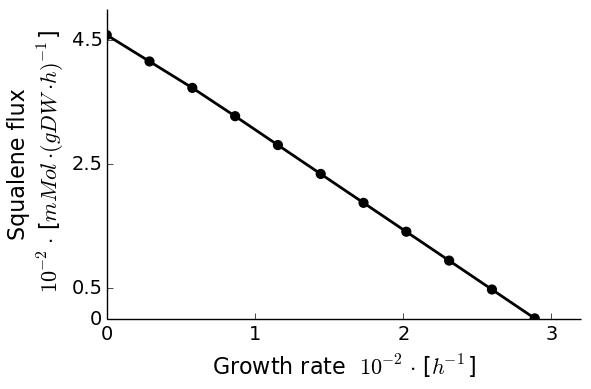

In [24]:
#trade-off plot for squalene

model.change_objective('BM0009') 
model.optimize()

maxi=model.solution.f
print maxi

maxlist=[]

x=0

while x<=maxi:
    maxlist.append(x)
    x+=0.0999*maxi
    
print maxlist

model.change_objective('SS0021') #optimize for squalene

xwerte=[]
y761=[]

for x in maxlist:
    
    model.reactions.BM0009.lower_bound=x #stepwise increase growth rate to optimum
    model.optimize()
    xwerte.append(x)
    y761.append(model.reactions.SS0021.x)
 
ax = plt.subplot(111)

ax.plot(xwerte,y761,linewidth=2,color='k')
ax.scatter(xwerte,y761,s=40,color='k') 

plt.xlabel('Growth rate  $10^{-2} \cdot $ [$h^{-1}$]',fontsize=16)
plt.ylabel('Squalene flux \n $10^{-2}\cdot$ [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.xaxis.set_major_locator(MaxNLocator(5))
#ax.yaxis.set_major_locator(MaxNLocator(4))

plt.xticks([0,1*10**-2,2*10**-2,3*10**-2],[0,1,2,3],fontsize=14)
#plt.yticks([0,.5*10**-2,1.5*10**-2,2.5*10**-2,3.5*10**-2,4.5*10**-2],[0,'$0.5 \cdot 10^{-2}$', '$1.5 \cdot 10^{-2}$' ,'$2.5 \cdot 10^{-2}$','$3.5 \cdot 10^{-2}$','$4.5 \cdot 10^{-2}$'],fontsize=14)
plt.yticks([0,.5*10**-2,2.5*10**-2,4.5*10**-2],[0,0.5,2.5,4.5],fontsize=14)

plt.ylim(0)
plt.xlim(0,.032)

plt.tight_layout()

#savefig("trade_off_squalene.png",bbox_inches='tight',dpi=1000)


0.0324275370753
[0, 0.003242750464777665, 0.00648550092955533, 0.009728251394332995, 0.01297100185911066, 0.016213752323888324, 0.019456502788665987, 0.02269925325344365, 0.025942003718221314, 0.029184754182998977, 0.03242750464777664]
[0.05084455698700864, 0.04610103472493717, 0.04135751247789093, 0.03642855627342264, 0.03122448425197234, 0.026020412228743222, 0.02081634017271411, 0.015612268132763844, 0.01040819610731996, 0.005204124071512135, 5.203208111915423e-08]


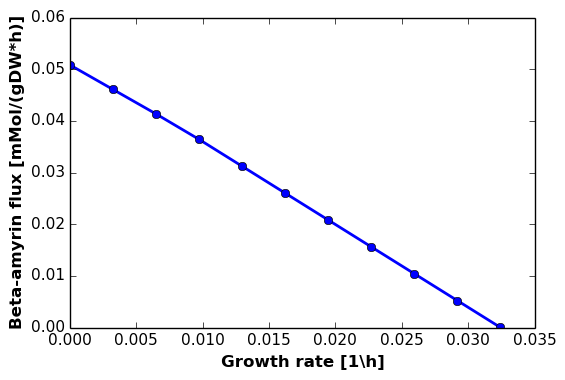

In [25]:
#trade-off plot for beta_amyrin

model=cobra.io.read_sbml_model("beta_amyrin.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 17.950524433090173 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

'''#ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''
model.change_objective('BM0009')
model.optimize()

maxi=model.solution.f
print maxi

maxlist=[]

x=0

while x<=maxi:
    maxlist.append(x)
    x+=0.0999999*maxi
    
print maxlist

model.change_objective('SS0025') #optimize for beta_amyrin

xwerte=[]
y767=[]
y761=[]

for x in maxlist:
    
    model.reactions.BM0009.lower_bound=x #stepwise increase growth rate to optimum
    model.optimize()
    xwerte.append(x)
    y767.append(model.reactions.SS0025.x)
    
plot(xwerte,y767,linewidth=2)
plot(xwerte,y767,"bo",markersize = 6) 


xlabel('Growth rate [1\h]',fontsize=12,fontweight='bold')
ylabel('Beta-amyrin flux [mMol/(gDW*h)]',fontsize=12,fontweight='bold')
xticks(fontsize=11)
yticks(fontsize=11)
#grid(True)

#savefig("trade_off_beta_amyrin.png")

print y767


## Simple Trade-Off Cofactors

0.0458390832184
[0, 0.004583903737934914, 0.009167807475869828, 0.013751711213804741, 0.018335614951739656, 0.02291951868967457, 0.027503422427609486, 0.0320873261655444, 0.03667122990347931, 0.04125513364141423, 0.04583903737934914]


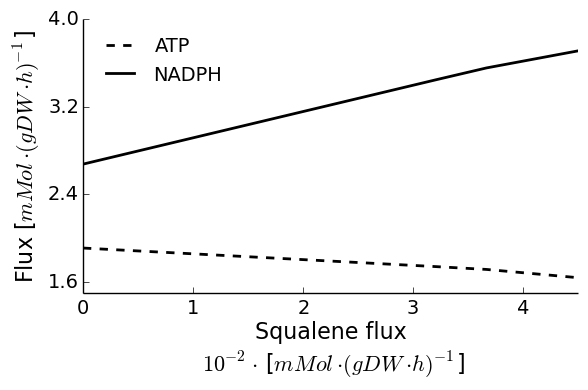

In [26]:
model=cobra.io.read_sbml_model("squalene.xml") #import cobra model

# SET PARAMETERS
#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

'''#ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''
model.change_objective('SS0021')
model.optimize()

maxi=model.solution.f
print maxi

maxlist=[]

x=0

while x<=maxi:
    maxlist.append(x)
    x+=0.0999999*maxi
    
print maxlist

model.change_objective('BM0009')

xwerte=[]
y90=[]
y129=[]
y492=[]
y493=[]
y100=[]
y4950=[]
ynadph=[]


for x in maxlist:
    
    model.reactions.SS0021.lower_bound=x #stepwise increase squalene flux to optimum
    model.optimize()
    xwerte.append(x)
    y90.append(model.reactions.BM0009.x) # growth rate
    y492.append(model.reactions.PR0044.x) # ATP thylakoidlumen
    y493.append(model.reactions.PR0045.x) # ATP periplasm
    y4950.append(model.reactions.PR0033.x) #mehler-like
    ynadph.append((model.reactions.PR0030.x) - (model.reactions.PR0006.x))# NADPH (FNR - NADPH-dehydrogenase)

    
ax = plt.subplot(111)

ax.plot(xwerte,y492,label="ATP",linewidth=2,linestyle='--',color='k')
#ax.plot(xwerte,y4950,label="mehler-like",linewidth=2,color='r')
ax.plot(xwerte,ynadph,label="NADPH",linewidth=2,linestyle='-',color='k')

plt.xlabel('Squalene flux \n $10^{-2}\cdot$ [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)
plt.ylabel('Flux [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)

plt.legend(loc='center', bbox_to_anchor=(1.3, 0.45),fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))

plt.xticks([0,1*10**-2,2*10**-2,3*10**-2,4*10**-2],[0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)

plt.legend(loc='best',fontsize=14,frameon=False)

#plt.ylim(0)
plt.xlim(0,.045)

plt.tight_layout()
#savefig("atp_nadph.png",bbox_inches='tight',dpi=1000)

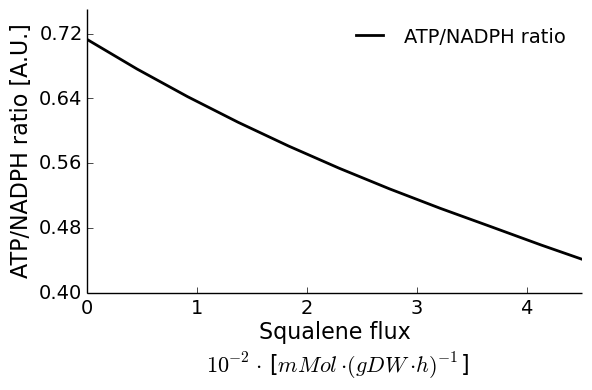

In [27]:
#ATP/NADPH ratio
y=[]

for x in range(len(y492)):
    y.append(y492[x]/ynadph[x])
    
ax = plt.subplot(111)

ax.plot(xwerte,y,linewidth=2,color='k',label='ATP/NADPH ratio')

plt.xlabel('Squalene flux \n $10^{-2}\cdot$ [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)
plt.ylabel('ATP/NADPH ratio [A.U.]',fontsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))

plt.xticks([0,1*10**-2,2*10**-2,3*10**-2,4*10**-2],[0,1,2,3,4],fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(0)
plt.xlim(0,.045)
plt.legend(loc='best',fontsize=14,frameon=False)
plt.tight_layout()
#savefig("atp_nadph_ratio.png",bbox_inches='tight')

## Pigment Trade-Off

0.0458390832184
[0, 0.004583862482760018, 0.009167724965520036, 0.013751587448280055, 0.01833544993104007, 0.02291931241380009, 0.027503174896560106, 0.03208703737932012, 0.03667089986208014, 0.041254762344840164, 0.045838624827600184]


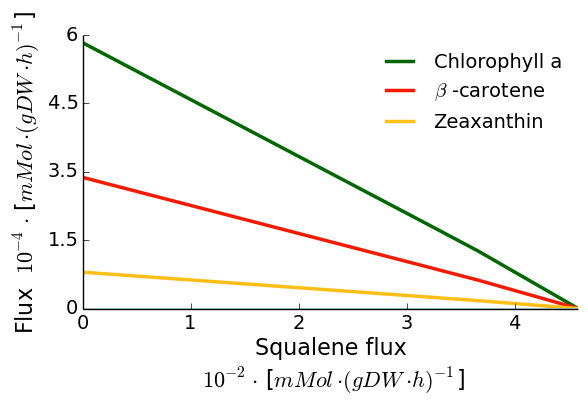

In [28]:
model=cobra.io.read_sbml_model("squalene.xml") #import cobra model

# SET PARAMETERS
#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

model.change_objective('SS0021')
model.optimize()

maxi=model.solution.f
print maxi

maxlist=[]

x=0

while x<=maxi:
    maxlist.append(x)
    x+=0.099999*maxi
    
print maxlist

model.change_objective('BM0009')

xwerte=[]
y90=[]
y129=[]
y492=[]
y493=[]
y100=[]
y105=[]
y97=[]
y98=[]
ynadph=[]


for x in maxlist:
    
    model.reactions.SS0021.lower_bound=x
    model.optimize()
    xwerte.append(x)
    y90.append(model.reactions.BM0009.x) #growth rate
    y98.append(model.reactions.CA0004.x) #Beta-carotene
    y129.append(model.reactions.CP0019.x) #Chlorophyll a
    y100.append(model.reactions.CA0010.x) #Zeaxanthin
    y105.append(model.reactions.HE0005.x) #Phycocyanin
    

#fig=plt.figure()
#ax1=fig.add_axes([0.1,0.1,0.8,0.8]) #x/y schnitt, breite, höhe

ax1 = plt.subplot(111)

#ax1.plot(xwerte,y90,label="Growth rate [$h^{-1}$]",linewidth=2)
ax1.plot(xwerte,y129,'#006700',label="Chlorophyll a ",linewidth=2.5)
ax1.plot(xwerte,y98,'#f61a01',label='beta-carotene',linewidth=2.5)
ax1.plot(xwerte,y100,'#ffbf17',label="Zeaxanthin",linewidth=2.5)
ax1.plot(xwerte,y105,'lightblue',label="Phycocyanin",linewidth=2)

ax1.set_ylim(0,6e-4)
ax1.set_xlim(0,maxi)
ax1.set_xlabel('Squalene flux \n $10^{-2}\cdot$ [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)
ax1.set_ylabel('Flux  $10^{-4}\cdot$ [$mMol \cdot (gDW \cdot h)^{-1}$]',fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(labelsize=14)
ax1.set_xticks([0,1*10**-2,2*10**-2,3*10**-2,4*10**-2])
ax1.set_xticklabels([0,1,2,3,4])
ax1.set_yticks([0,1.5*10**-4,3*10**-4,4.5*10**-4,6*10**-4])
ax1.set_yticklabels([0,1.5,3.5,4.5,6])

lines=[Line2D(range(10), range(10), linestyle='-', linewidth=2.5, color='#006700'),
        Line2D(range(10), range(10), linestyle='-',linewidth=2.5, color='#f61a01'),
        Line2D(range(10), range(10), linestyle='-',linewidth=2.5, color='#ffbf17')]

#legend(lines,labeli,bbox_to_anchor=(1.35,1.025),frameon=False,fontsize=14)
label_s=['Chlorophyll a', r'$\beta$ -carotene', 'Zeaxanthin']
plt.legend(lines,label_s,loc='best',fontsize=14,frameon=False)
plt.tight_layout()
#savefig("pigment.png",bbox_inches='tight',dpi=1000)

## Identification of Modification Targets

In [29]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

'''ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''

"ratiometric bounds\nmodel.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by

In [30]:
model.objective
model.optimize()
model.solution.f

0.028903923957142197

In [31]:
model.change_objective('BM0009')
model.optimize()

biomass=model.solution.x_dict #biomass maximum

model.change_objective('SS0021')
model.optimize()

product=model.solution.x_dict #squalene maximum

reac_name=[]
reac_value=[]
new_biomass={}
new_product={}

for x in biomass:
    if abs(product[x]) > abs(biomass[x]) and (product[x]*biomass[x]) >=0: #select only targets, where flux increases, and flux direction does not change
        new_biomass[x]=biomass[x]
        new_product[x]=product[x]

stei={}
final={}
tupl=[]

for key in new_biomass:
    value=(new_product[key]-new_biomass[key])/0.0458390832183 #calculate slope
    stei[key]=value
    
#print stei
for key in stei:
    if abs(stei[key])>=1 and abs(stei[key])<=6.1:#only targets with increase >5
        reac_value.append(abs(stei[key])) #normalize slope
        reac_name.append(key)
        
reac_value= [i/max(reac_value)*100 for i in reac_value]

final=dict(zip(reac_name,reac_value))
tupl=sorted(final.items(), key=lambda x:x[1])

In [32]:
for x in stei:
    if abs(stei[x])>=1:
        print x,stei[x]


GE0002 9.66373659251
GE0008 -2.33920366822
PP0011 9.96261504382
PP0012 9.96261504382
GS0003_2 25.1308900523
GS0011 1.98644317441
PY0012 5.89940571214
TR2001 5.95178826074
PR0040 2.97589413037
PR0041 2.97589413037
PR0042 2.97589413037
PY0009 5.88425865591
TE0010 1.9730386069
TR0002 -2.96965057048
TR0003 6.56544502621
TR0004 -2.43724969363
SS0021 1.0
PT0001 4.28746500406
PT0009 1.52988906178
TE0011 1.9730386069
TR1005 10.4218558017
TR1003 -6.56544502621
TR1002 -2.96965057048
TR1001 4.78624036815
EX0003 3.85641077548
EX0002 -2.96965057048
EX0004 7.96869829096
TE0007 6.00000000002
TE0006 5.89219099962
TE0005 5.89219099962
TE0004 5.89219099962
TE0003 5.89219099962
TE0002 5.89219099962
TE0001 5.89189842351
PR0039 2.97589413037
PR0038 5.95178826072
PR0030 17.9647141871
PR0037 5.95178826072
PR0036 11.9035765215
PT0022 3.38608765524
TR0006_2 10.4218558017
PR0002 11.9035765215
GM0022 -2.75932586584
TR2002 2.97589413037
GM0027 3.02647759289
ME0001 10.4218558017
PR0014 13.2303664923
SS0017 1.0
PP0

In [33]:
#sort list by slope from lowest to highest
list1= [ x[0] for x in tupl ]
list2= [ x[1] for x in tupl]
print list1
list1=['SS0021', 'SS0017', 'PT0009', 'TE0010', 'TE0011', 'GS0011', 'PP0007', 'GE0008', 'TR0004', 'GM0022', 'EX0002', 'TR0002', 'TR1002', 'PR0039', 'PR0040', 'PR0041', 'PR0042', 'PR0043', 'TR2002', 'GM0027', 'GS0006', 'PT0022', 'EX0003', 'PT0001', 'TR1001', 'PP0008', 'PY0009', 'TE0001', 'TE0006', 'TE0004', 'TE0002', 'TE0005', 'TE0003', 'PY0012', 'PR0038', 'PR0037', 'TR2001', 'TE0007']


['SS0021', 'SS0017', 'PT0009', 'TE0010', 'TE0011', 'GS0011', 'PP0007', 'GE0008', 'TR0004', 'GM0022', 'EX0002', 'TR0002', 'TR1002', 'PR0039', 'PR0040', 'PR0041', 'PR0042', 'PR0043', 'TR2002', 'GM0027', 'GS0006', 'PT0022', 'EX0003', 'PT0001', 'TR1001', 'PP0008', 'PY0009', 'TE0001', 'TE0006', 'TE0004', 'TE0002', 'TE0005', 'TE0003', 'PY0012', 'PR0038', 'PR0037', 'TR2001', 'TE0007']


In [34]:
colors=[]

for i in list1:
    if 'SS' in i: #stress
        colors.append('#0b2863')#08519c
    if 'PT' in i: #pyruvate and tca
        colors.append('white')
    if 'TE' in i: #terpenoids
        colors.append('#0b2863')
    if 'GS' in i: #glycolysis
        colors.append('white')
    if 'PP' in i: #pentose phosphate pathway
        colors.append('#9b9aa9')
    if 'GE' in i: #general
        colors.append('#9ecae1')   
    if 'TR' in i: #transport
        colors.append('#3573a9')
    if 'GM' in i: #cgsm aa
        colors.append('#0800f2')
    if 'EX' in i: #export
        colors.append('#3573a9')
    if 'PR' in i: #photosynthesis
        colors.append('#9ecae1')#4292c6
    if 'PY' in i: #pyrimidine
        colors.append('#0b2863')

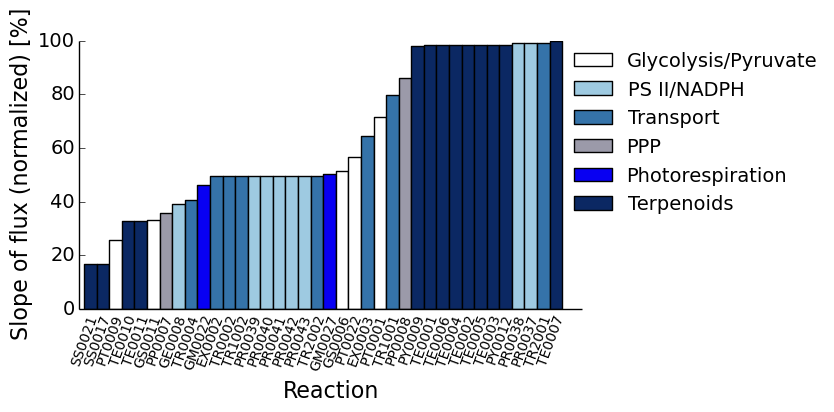

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch

#color key: yellow=MEP pathway, orange=acetate kinase, purple=CBB cycle,
                                                 #cyan=G3P generation,dark blue=NADPH-reductase


ax = plt.subplot(111)

ax.bar(np.arange(len(list2))+0.9,list2,align='center',width=1,color=colors)
plt.xticks(np.arange(len(list1))+0.5,list1,rotation=70,fontsize=12)

#xlim(-2,42)
#ylim(0,105)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)

plt.xlabel('Reaction',fontsize=16)
plt.ylabel('Slope of flux (normalized) [%]',fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')




lines=[ mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='white',ec='k'),
        mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='#9ecae1',ec='k'),
        mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='#3573a9',ec='k'),
        mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='#9b9aa9',ec='k'),
        mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='#0800f2',ec='k'),
        mpatches.Rectangle(xy=(0.5,0.5),width=1,height=1,color='#0b2863',ec='k')]

labels=['Glycolysis/Pyruvate','PS II/NADPH','Transport','PPP','Photorespiration','Terpenoids']
legend(lines,labels,bbox_to_anchor=(1.5,1.025),frameon=False,fontsize=14)


#plt.ylim(0)
#plt.xlim(0,.045)

plt.tight_layout()
#plt.savefig("ampli.png",bbox_inches='tight',dpi=1000)

## Trade-Off Plots for Identified Targets

In [36]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

'''ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''

"ratiometric bounds\nmodel.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by

In [37]:
model.objective
model.optimize()
model.solution.f

0.028903923957142197

In [38]:
model.change_objective('BM0009')
model.optimize()

maxi=model.solution.f

maxlist=[]

x=0

while x<=maxi:
    maxlist.append(x)
    x+=0.099999999*maxi

maxlist.sort(reverse=True)
print maxlist


model.change_objective('SS0021')

path=os.getcwd()

if not os.path.exists(path+'/trade_off_plots'): 
    os.makedirs(path+'/trade_off_plots')

os.chdir(path+'/trade_off_plots')


for name in reac_name:
    
    xwerte=[]
    y90=[]
    ywerte=[]
    
    for x in maxlist:
        
        model.reactions.BM0009.lower_bound=x #stepwise decrease growth rate
        model.optimize()
        y90.append(x)
        xwerte.append(model.reactions.SS0021.x)
        ywerte.append(model.reactions.get_by_id(name).x)
    
    
    #plot(xwerte,y90,label="Growth Rate [1/h]")
    plot(xwerte,ywerte,label=name+"flux [mMol/(gDW*h)]")

    xlabel('squalene synthesis [mMol/(gDW*h)]',fontsize=12,fontweight='bold')
    ylabel(name+' flux [mMol/(gDW*h)]',fontsize=12,fontweight='bold')
        
    savefig(name+".png") 
    clf()

os.chdir(path)

[0.02890392366810296, 0.026013531301292664, 0.023123138934482368, 0.020232746567672072, 0.017342354200861776, 0.01445196183405148, 0.011561569467241184, 0.008671177100430888, 0.005780784733620592, 0.002890392366810296, 0]


## Table of Reaction Names

In [39]:
#search for reaction names in csv
dic={}
file1= pd.read_csv('/home/darwin/Dokumente/UNI/Master/Master_Thesis/Triterpenoids/Modeling/Synechocystis6803_network_15_02_17.csv',header=None)

for name in reac_name:
    for x in range(len(file1[0])):
        if file1[0][x] == name:
            dic[name]=file1[3][x]
            print file1[3][x]

dic

NADPH_[cyt] + H+_[cyt] + NAD+_[cyt] <=> NADP+_[cyt] + H+_[cyt] + NADH_[cyt]
2-Phospho-D-glycerate_[cyt] <=> Phosphoenolpyruvate_[cyt] + H2O_[cyt]
ATP_[cyt] + CDP_[cyt] <=> ADP_[cyt] + CTP_[cyt]
1 H2O_[cyt] <=> 1 H2O_[tll]
1 P680p_[tlm] + 1 S1_P680_[tlm] => 1 P680_[tlm] + 1 S2_P680_[tlm]
1 P680p_[tlm] + 1 S2_P680_[tlm] => 1 P680_[tlm] + 1 S3_P680_[tlm]
1 P680p_[tlm] + 1 S3_P680_[tlm] => 1 P680_[tlm] + 1 S4_P680_[tlm]
ATP_[cyt] + CMP_[cyt] <=> ADP_[cyt] + CDP_[cyt]
Dimethylallyl diphosphate_[cyt] + Isopentenyl diphosphate_[cyt] => Diphosphate_[cyt] + Geranyl diphosphate_[cyt]
1 Oxygen_[pps] <=> 1 Oxygen_[cyt]
1 H2O_[pps] <=> 1 H2O_[cyt]
ATP_[cyt] + Pyruvate_[cyt] <= ADP_[cyt] + Phosphoenolpyruvate_[cyt]
L-Aspartate_[cyt] + 2-Oxoglutarate_[cyt] <=> Oxaloacetate_[cyt] + L-Glutamate_[cyt]
Geranyl diphosphate_[cyt] + Isopentenyl diphosphate_[cyt] => Diphosphate_[cyt] + trans,trans-Farnesyl diphosphate_[cyt]
Oxygen_[med] <=> Oxygen_[pps]
H+_[med] <=> H+_[pps]
CO2_[ext] <=> CO2_[med]
Oxygen_[e

{'EX0002': 'Oxygen_[ext] <=> Oxygen_[med]',
 'EX0003': 'CO2_[ext] <=> CO2_[med]',
 'GE0008': 'NADPH_[cyt] + H+_[cyt] + NAD+_[cyt] <=> NADP+_[cyt] + H+_[cyt] + NADH_[cyt]',
 'GM0022': 'Glycine_[cyt] + 2-Oxoglutarate_[cyt] <=> Glyoxylate_[cyt] + L-Glutamate_[cyt]',
 'GM0027': 'Glycine_[cyt] + H2O_[cyt] + NAD+_[cyt] <=> Glyoxylate_[cyt] + NH3_[cyt] + NADH_[cyt] + H+_[cyt]',
 'GS0006': 'D-Glyceraldehyde 3-phosphate_[cyt] <=> Glycerone phosphate_[cyt]',
 'GS0011': '2-Phospho-D-glycerate_[cyt] <=> Phosphoenolpyruvate_[cyt] + H2O_[cyt]',
 'PP0007': 'D-Sedoheptulose 7-phosphate_[cyt] + D-Glyceraldehyde 3-phosphate_[cyt] <=> D-Ribose 5-phosphate_[cyt] + D-Xylulose 5-phosphate_[cyt]',
 'PP0008': 'D-Fructose 6-phosphate_[cyt] + D-Glyceraldehyde 3-phosphate_[cyt] <=> D-Erythrose 4-phosphate_[cyt] + D-Xylulose 5-phosphate_[cyt]',
 'PR0037': '1 PQ_[tlm] + 1 QAn_P680_[tlm] + H+_[cyt] => 1 PQn_P680_[tlm] + 1 QA_P680_[tlm]',
 'PR0038': '1 PQn_P680_[tlm] + 1 QAn_P680_[tlm] + H+_[cyt] => 1 PQH2_[tlm] + 1

In [40]:
series=pd.Series(dic)
frame=pd.DataFrame(series,columns=['reactions'])
pd.set_option('max_colwidth',200)

print pd.DataFrame.to_latex(frame) #convert dataframe to latex table

\begin{tabular}{ll}
\toprule
{} &                                                                                                                                                                                   reactions \\
\midrule
EX0002 &                                                                                                                                                               Oxygen\_[ext] <=> Oxygen\_[med] \\
EX0003 &                                                                                                                                                                     CO2\_[ext] <=> CO2\_[med] \\
GE0008 &                                                                                                                 NADPH\_[cyt] + H+\_[cyt] + NAD+\_[cyt] <=> NADP+\_[cyt] + H+\_[cyt] + NADH\_[cyt] \\
GM0022 &                                                                                                               Glycine\_[cyt] + 2-Oxoglutarate\_[cyt

# FVA for targets

In [41]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

'''ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''

"ratiometric bounds\nmodel.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%\n\nmodel.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10\nmodel.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%\n\nmodel.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200\nmodel.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%\n\nmodel.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200\nmodel.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by

In [42]:
model.objective
model.optimize()
model.solution.f

0.028903923957142197

In [43]:
model.change_objective('BM0009')
model.optimize()

max1=model.solution.f

print max1

maxlist=[]

n=0

while n<=max1:
    maxlist.append(n)
    n+=0.09999999*max1

maxlist.sort(reverse=True)
print maxlist

model.change_objective('SS0021')

if not os.path.exists(path+'/fva_plots'):
    os.makedirs(path+'/fva_plots')

os.chdir(path+"/fva_plots")

fraction=range(0,101,10)

for name in reac_name:
    
    mini=[]
    maxi=[]
    

    for x in maxlist:

        model.reactions.BM0009.lower_bound=x
        
        model.optimize()

        fva_result = cobra.flux_analysis.flux_variability_analysis(model, model.reactions) #FVA results for each reaction
        pd.DataFrame.from_dict(fva_result) 

        fva=fva_result[name].values()

        mini.append(fva[0])
        maxi.append(fva[1])

    ylabel(name+' flux [mMol/(g*h)]',fontsize=12,fontweight='bold')
    xlabel('squalene synthesis [%]',fontsize=12,fontweight='bold')
    xticks(fontsize=11)
    yticks(fontsize=11)

    plot(fraction,mini,'--',color='black',linewidth=2)
    plot(fraction,maxi,color='blue',linewidth=2)
    fill_between(fraction,maxi,mini,color='#ffff00')
        
    savefig(name+".png")
    clf()

os.chdir(path)

0.0289039239571
[0.0289039210667498, 0.02601352896007482, 0.02312313685339984, 0.02023274474672486, 0.01734235264004988, 0.0144519605333749, 0.01156156842669992, 0.00867117632002494, 0.00578078421334996, 0.00289039210667498, 0]


# Knockdowns

In [45]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 17.950524433090173 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()

IOError: Error reading file 'squalene.xml': failed to load external entity "squalene.xml"

In [ ]:
model.change_objective('BM0009')
model.optimize()

biomass=model.solution.x_dict #biomass maximum

model.change_objective('SS0021')
model.optimize()

product=model.solution.x_dict #squalene maximum

reac_name=[]
reac_value=[]
new_biomass={}
new_product={}

for x in biomass:
    if product[x] > biomass[x] and (product[x]*biomass[x]) >=0: #select only targets, where flux decreases, and flux direction does not change
        new_biomass[x]=biomass[x]
        new_product[x]=product[x]

stei={}
final={}
tupl=[]

for key in new_biomass:
    value=(new_product[key]-new_biomass[key])/0.04579767662985241 #calculate slope
    stei[key]=value
    
for key in stei:
    if abs(stei[key])> 1.5 and abs(stei[key])< 15:
        reac_value.append(stei[key])
        reac_name.append(key)

print reac_value
max(stei.values())
final=dict(zip(reac_name,reac_value))
tupl=sorted(final.items(), key=lambda x:x[1], reverse=True)

In [ ]:
list1= [ x[0] for x in tupl ]
list2= [ x[1] for x in tupl]
print list1
list1= ['AL0008', 'AL0007', 'AL0010', 'PU0014', 'PU0013', 'AG0020', 'AG0021', 'PR0031', 'IL0003', 'IL0005', 'IL0006', 'AL0001', 'IL0008', 'GM0010', 'PU0004', 'LI0010_2', 'LI0025', 'LI0026', 'PU0008', 'PU0009', 'PU0010', 'PU0007', 'PU0005', 'PU0002', 'PU0001', 'PU0006', 'PY0010_2', 'PU0020', 'AA0004', 'AA0005', 'AA0007', 'AA0003', 'AA0008', 'AA0009', 'TR3002', 'TR3006', 'PT0024', 'PU0011', 'FO0015', 'LI0021', 'LI0020', 'LI0023', 'LI0022', 'LI0024', 'LI0002', 'LI0001', 'LI0006', 'LI0005', 'FO0016', 'TR0017_2', 'EX0015', 'TR1016', 'PP0013', 'GM0033', 'GM0035', 'AG0003_2', 'PP0008', 'PT0008', 'GS0010', 'LI0004', 'LI0003', 'PT0010', 'PP0018_2', 'GM0022', 'PP0006', 'PP0007', 'PT0021', 'AG0005']

In [ ]:
colors=[]

for i in list1:
    if 'PT' in i:
        colors.append('#c6dbef')
    if 'AG' in i:
        colors.append('#9ecae1')
    if 'PP' in i:
        colors.append('darkblue')
    if 'GS' in i:
        colors.append('#4292c6')
    if 'GM' in i:
        colors.append('#2171b5')
    if 'AL' in i:
        colors.append('#08519c')
    if 'EX' in i:
        colors.append('black')
    if 'TR' in i:
        colors.append('darkblue')
    if 'PU' in i:
        colors.append('#08306b')
    if 'PY' in i:
        colors.append('blue')
    if 'PR' in i:
        colors.append('grey')


In [ ]:
import matplotlib.pyplot as plt

#color key: yellow=MEP pathway, orange=acetate kinase, purple=CBB cycle,
                                                 #cyan=G3P generation,dark blue=NADPH-reductase

plt.bar(range(len(list2)),list2,align='center',width=1,color=colors)
plt.xticks(range(len(list1)),list1,rotation=90)

#xlim(-2,36)
#ylim(0,105)
xticks(fontsize=9)
yticks(fontsize=9)

xlabel('Reaction',fontsize=12,fontweight='bold')
ylabel('Normalized slope of flux [%]',fontsize=12,fontweight='bold')

#savefig("bottlenecks.png")

## Table of reaction names

In [ ]:
dic={}
file1= pd.read_csv('/home/darwin/Dokumente/UNI/Master/Master_Thesis/Triterpenoids/Modeling/Synechocystis6803_network_15_02_17.csv',header=None)

for name in reac_name:
    for x in range(len(file1[0])):
        if file1[0][x] == name:
            dic[name]=file1[3][x]
            print file1[3][x]

dic

In [ ]:
series=pd.Series(dic)
frame=pd.DataFrame(series,columns=['reactions'])
pd.set_option('max_colwidth',100)

print pd.DataFrame.to_latex(frame) #convert dataframe to latex table

## FVA Plots for Identified Targets

In [ ]:
model=cobra.io.read_sbml_model("squalene.xml")

#objective
model.change_objective('BM0009')   #biomass

#bounds
model.reactions.get_by_id('PR0001').upper_bound = 16 #light


model.reactions.get_by_id('EX0006').upper_bound = 0 #glucose in
model.reactions.get_by_id('EX0006').lower_bound = 0 #glucose in

model.reactions.get_by_id('EX0007').upper_bound = 0 #glutamine in
model.reactions.get_by_id('EX0007').lower_bound = 0 #glutamine in

model.reactions.get_by_id('EX0008').upper_bound = 0 #arginine in
model.reactions.get_by_id('EX0008').lower_bound = 0 #arginine in

model.reactions.get_by_id('EX0009').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0009').lower_bound = 0 #glutamate in

model.reactions.get_by_id('EX0010').upper_bound = 0 #histidine in
model.reactions.get_by_id('EX0010').lower_bound = 0 #histidine in

model.reactions.get_by_id('EX0011').upper_bound = 0 #urea in
model.reactions.get_by_id('EX0011').lower_bound = 0 #urea in

model.reactions.get_by_id('EX0013').upper_bound = 0 #nh4+ in
model.reactions.get_by_id('EX0013').lower_bound = 0 #nh4+ in

model.reactions.get_by_id('EX0028').upper_bound = 0 #putrescine in
model.reactions.get_by_id('EX0028').lower_bound = 0 #putrescine in

model.reactions.get_by_id('EX0029').upper_bound = 0 #spermidine in
model.reactions.get_by_id('EX0029').lower_bound = 0 #spermidine in

model.reactions.get_by_id('EX0035').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0035').lower_bound = 0 #glutamate in


model.reactions.get_by_id('EX0038').upper_bound = 0 #glutamate in
model.reactions.get_by_id('EX0038').lower_bound = 0 #glutamate in

model.reactions.get_by_id('TR3007').upper_bound = 0 #carboxysome co2 uptake
model.reactions.get_by_id('TR3007').lower_bound = 0 #carboxysome co2 uptake

model.reactions.get_by_id('PR0045').upper_bound = 0 #atpase cytoplasmatic membrane

model.reactions.get_by_id('TR0003').lower_bound = 0 #co2 cyt to pps

model.optimize()
'''
#ratiometric bounds
model.reactions.get_by_id('PR0010').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0010_2').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0010_2').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #COX 10%

model.reactions.get_by_id('PR0033').upper_bound = (model.reactions.get_by_id('PR0043').x)/10
model.reactions.get_by_id('PR0033').lower_bound = (model.reactions.get_by_id('PR0043').x)/10 #mehler like 10%

model.reactions.get_by_id('PR0032').upper_bound = (model.reactions.get_by_id('PR0002').x)/200
model.reactions.get_by_id('PR0032').lower_bound = (model.reactions.get_by_id('PR0002').x)/200 #mehler 0.5%

model.reactions.get_by_id('PR0034').lower_bound = model.reactions.get_by_id('PR0003').x/200
model.reactions.get_by_id('PR0034').upper_bound = model.reactions.get_by_id('PR0003').x/200 #PS2 oxid 0.5%

model.reactions.get_by_id('GE0001').lower_bound = model.reactions.get_by_id('PR0044').x/(10/3)
model.reactions.get_by_id('GE0001').upper_bound = model.reactions.get_by_id('PR0044').x/(10/3) #10% ATPase (10% maintenance)

'''

In [ ]:
model.change_objective('BM0009')
model.optimize()

max1=model.solution.f

print max1

maxlist=[]

n=0

while n<=max1:
    maxlist.append(n)
    n+=0.0999*max1

maxlist.reverse()
print maxlist

model.change_objective('SS0021')

if not os.path.exists(path+'/fva_plots'):
    os.makedirs(path+'/fva_plots')

os.chdir(path+"/fva_plots")

for name in reac_name:
    
    mini=[]
    maxi=[]
    fraction=range(0,101,10)

    for x in maxlist:

        model.reactions.BM0009.lower_bound=x
        
        model.optimize()

        fva_result = cobra.flux_analysis.flux_variability_analysis(model, model.reactions) #FVA results for each reaction
        pd.DataFrame.from_dict(fva_result) 

        fva=fva_result[name].values()

        mini.append(fva[0])
        maxi.append(fva[1])

    ylabel(name+' flux [mMol/(g*h)]',fontsize=12,fontweight='bold')
    xlabel('squalene synthesis [%]',fontsize=12,fontweight='bold')
    xticks(fontsize=11)
    yticks(fontsize=11)

    plot(fraction,mini,'--',color='black',linewidth=2)
    plot(fraction,maxi,color='blue',linewidth=2)
    fill_between(fraction,maxi,mini,color='#ffff00')
        
    savefig(name+".png")
    clf()

os.chdir(path)

## Biomass Composition Pie Chart

0.51 B1_cyt Protein,
0.031 B2_cyt DNA,
0.17 B3_cyt RNA,
0.034 C00182_cyt Glycogen,
0.059 B4_cyt (Cellwall: peptidoglycan + LPS),
0.12 B5_cyt Lipid,
0.029 B6_cyt Soluble Pool,
0.01 B7_cyt Inorganis Ions,
0.0244391698 B8_cyt Pigments

In [ ]:
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Proteins', 'Pigments', 'Lipids', 'Inorganic Ions','Cellwall', 'DNA','Glycogen', 'RNA', 'Metabolites'
fracs = [51.0, 2.44391698, 12.0, 1.0, 17.0, 5.9, 3.1, 3.4, 2.9]
explode=(0, 0.0, 0, 0, 0, 0, 0, 0, 0)
colors=('#0d0840','#ff6309','#c30707','#0800e3','#eccc0c','#02e0f2','#8d0056','#22ff00','#ee70e9')

pie(fracs, explode=explode, colors=colors,
                 shadow=True, startangle=90)
                
legend(labels,loc='center left', bbox_to_anchor=(1,0.5), frameon=False,fontsize=15)

#savefig("biomass_components.png")